In [1]:
import numpy as np
import pandas as pd
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = 12,5

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import learning_curve, validation_curve

from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

In [2]:
def rand_gl(x, m , name=None, labels=None):
  cat = []
  for i in range(m):
    cat += [rd.randint(0,x)]
  
  if name is None:
    cat = pd.Series(cat, dtype = 'category', name='categories')
  else:
    cat = pd.Series(cat, dtype = 'category', name=name)

  if labels is None:
    return cat
  else:
    return cat.cat.rename_categories(labels)

In [3]:
males = pd.DataFrame({'height': np.random.normal(170, 12.45, 1000),
                      'weight': np.random.normal(74.2, 6.67, 1000),
                      'female': [0]*1000,
                      'siblings': rand_gl(1,1000, labels=['yes', 'no']) })
females = pd.DataFrame({'height': np.random.normal(165, 10.81, 500),
                      'weight': np.random.normal(65.5, 5.31, 500),
                      'female': [1]*500,
                      'siblings': rand_gl(1,500, labels=['yes', 'no']) })
mydata = pd.concat([males, females])
mydata.head()

,height,weight,female,siblings
0,169.239612,70.014210,0,yes
1,182.283751,70.933811,0,no
2,186.639307,73.450973,0,no
3,194.679656,75.251294,0,no
4,172.713053,82.673243,0,yes


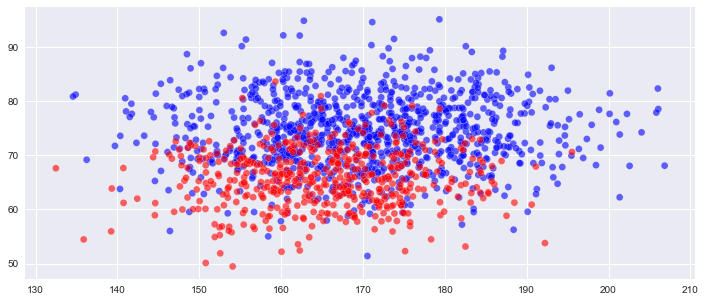

In [4]:
colors = {0: 'blue', 1: 'red'}

plt.scatter(mydata['height'], mydata['weight'],
            c = mydata['female'].map(colors),
            alpha = 0.6,
            edgecolor = 'white')

plt.show()

In [5]:
features = ['height', 'weight']
x_train, x_test, y_train, y_test = train_test_split(mydata[features],
                                                    mydata['female'],
                                                    test_size = 0.20,
                                                    random_state = 1,
                                                    stratify = mydata['female'])

In [6]:
# Classifier
model = GaussianNB()

# Fit the Model 
model.fit(x_train[features],
          y_train)

# Predictions
predicted = model.predict(x_test[features])
expected = y_test

# Output
output = pd.DataFrame({'expected': expected,
                       'predicted': predicted})
output.head()

,expected,predicted
914,0,0
20,1,1
390,0,0
778,0,0
68,1,0


# Validation Curve

In [7]:
param_range = np.logspace(-9, -1, 10)
train_scores, test_scores = validation_curve(model,
                                             mydata[features],
                                             mydata['female'],
                                             n_jobs = -1,
                                             scoring = 'accuracy',
                                             param_range = param_range,
                                             param_name = 'var_smoothing')

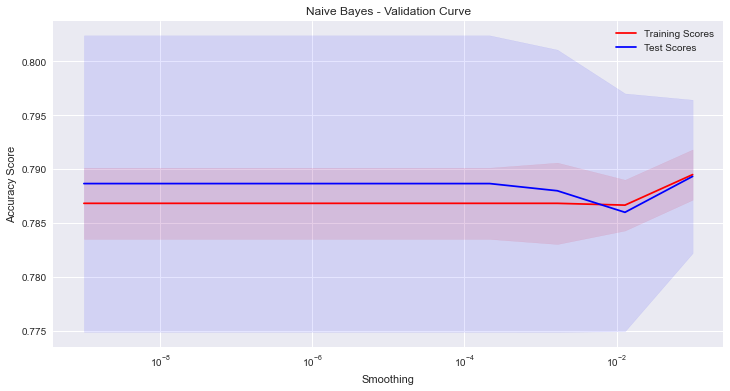

In [8]:
# Mean Values -------------------------------------------------------------------
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

# Graph -------------------------------------------------------------------------
plt.figure(figsize = (12,6))

plt.semilogx(param_range, train_scores_mean, label = 'Training Scores', color = 'red')
plt.fill_between(param_range, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha = 0.1,
                 color = 'red')

plt.semilogx(param_range, test_scores_mean, label = 'Test Scores', color = 'blue')
plt.fill_between(param_range, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha = 0.1,
                 color = 'blue')

plt.title('Naive Bayes - Validation Curve')
plt.xlabel('Smoothing')
plt.ylabel('Accuracy Score')

plt.legend(loc='best')
plt.show()

# Learning Curve

In [9]:
train_size, train_scores, test_scores, fit_times, _ = learning_curve(model,
                                                                     mydata[features],
                                                                     mydata['female'],
                                                                     cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1),
                                                                     n_jobs = -1,
                                                                     train_sizes = np.linspace(0.1, 1.0, 10),
                                                                     return_times = True)

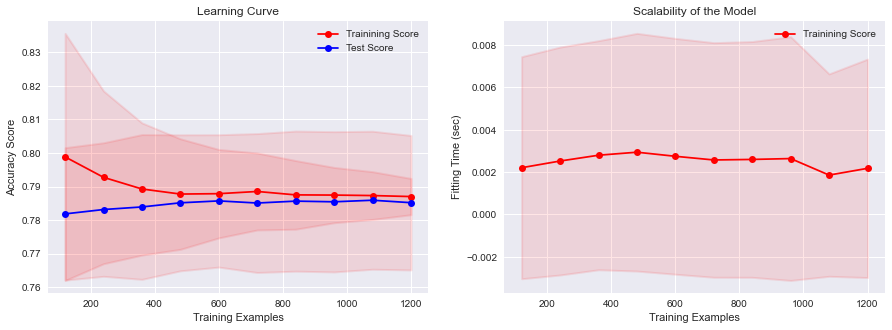

In [10]:
# Mean Values -------------------------------------------------------------------
train_scores_mean = np.mean(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
fit_times_mean = np.mean(fit_times, axis = 1)

train_scores_std = np.std(train_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)
fit_times_std = np.std(fit_times, axis = 1)

# Figures -----------------------------------------------------------------------
plt.figure(figsize=(15,5))
plt.subplot2grid((1,2), (0,0))
plt.plot(train_size, train_scores_mean, 'o-', color = 'red', label = 'Trainining Score')
plt.fill_between(train_size,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha = 0.1,
                 color = 'red',
                 lw = 2)

plt.plot(train_size, test_scores_mean, 'o-', color = 'blue', label = 'Test Score')
plt.fill_between(train_size,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha = 0.1,
                 color = 'red',
                 lw = 2)

plt.title('Learning Curve')
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.legend(loc = 'best')

plt.subplot2grid((1,2), (0,1))
plt.plot(train_size, fit_times_mean, 'o-', color = 'red', label = 'Trainining Score')
plt.fill_between(train_size,
                 fit_times_mean - fit_times_std,
                 fit_times_mean + fit_times_std,
                 alpha = 0.1,
                 color = 'red',
                 lw = 2)

plt.title('Scalability of the Model')
plt.xlabel('Training Examples')
plt.ylabel('Fitting Time (sec)')

plt.legend(loc = 'best')
plt.show()

# Metrics

In this section we are going to see how our model behaves:

 * Confusion Matrix:
  * Accuracy
  * Precision
  * Recall
 * ROC and PR curves
  * Area under the curve

In [11]:
print('Confusion Matrix\n\n', confusion_matrix(expected, predicted))

Confusion Matrix

 [[180  20]
 [ 40  60]]


In [12]:
print('Accuracy: ', metrics.accuracy_score(expected, predicted))
print('Precision: ', metrics.precision_score(expected, predicted))
print('Recall: ', metrics.recall_score(expected, predicted))

Accuracy:  0.8
Precision:  0.75
Recall:  0.6


Precision and Recall are

  * **Precision** is the rate of the True Positives to the *total predicted positives*
  * **Recall** is the rate of True Positives to the *total true positives*

# Graphical Analysis

We have

 * ROC curves(Receiver-Operator) 
 * PR curves (Precision-Recall)

ROC curves are too optimistic when we have unbalanced data


In [13]:
model_probs = model.predict_proba(x_test.values)
fp, tp, thresholds = roc_curve(y_test, model_probs[:,1], pos_label=1)
prec, rec, _ = precision_recall_curve(y_test, model_probs[:,1], pos_label=1)

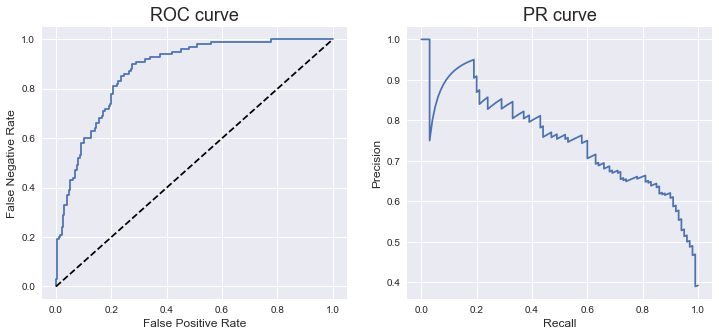

In [14]:
plt.subplot(1,2,1)
plt.plot(fp, tp)
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC curve', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('False Negative Rate', fontsize = 12)

plt.subplot(1,2,2)
plt.plot(rec, prec)
plt.title('PR curve', fontsize = 18)
plt.ylabel('Precision', fontsize = 12)
plt.xlabel('Recall', fontsize = 12)

plt.show()

In [15]:
metrics.auc(fp, tp)

0.87385

In [16]:
metrics.auc(rec, prec)

0.753472996121387

## Repeat the same with a KNNeighbors model

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# Model -------------------------------------------------------------------------
model2 = KNeighborsClassifier()

# Fit ---------------------------------------------------------------------------
model2.fit(x_train[features], y_train)

# Predictions -------------------------------------------------------------------
y_pred2 = model2.predict(x_test[features])
print('Accuracy:','{:.2%}'.format(metrics.accuracy_score(y_test, y_pred2)))

# Predictions
predicted2 = y_pred2
expected = y_test

# Output
output2 = pd.DataFrame({'expected': expected,
                       'predicted': predicted2})
output2.head()

Accuracy: 74.67%


,expected,predicted
914,0,0
20,1,1
390,0,0
778,0,0
68,1,0


In [19]:
model2?

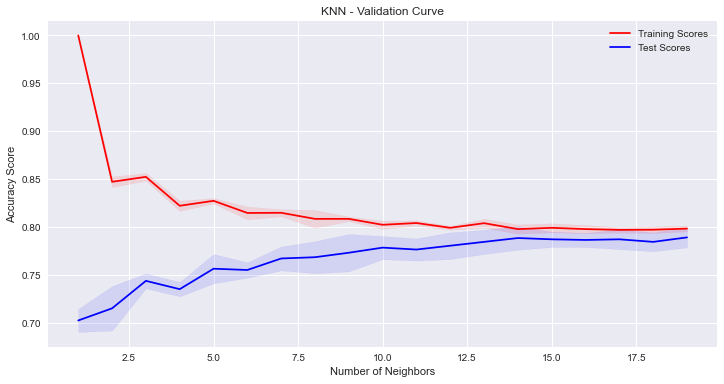

In [20]:
# Validation curve --------------------------------------------------------------
param_range = np.arange(1,20,1)
train_scores, test_scores = validation_curve(model2,
                                             mydata[features],
                                             mydata['female'],
                                             cv = 5,
                                             scoring = 'accuracy',
                                             param_range = param_range,
                                             param_name = 'n_neighbors')

# Mean Values -------------------------------------------------------------------
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

# Graph -------------------------------------------------------------------------
plt.figure(figsize = (12,6))
#plt.ylim(0.9,1.0)

plt.plot(param_range, train_scores_mean, label = 'Training Scores', color = 'red')
plt.fill_between(param_range, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha = 0.1,
                 color = 'red')

plt.plot(param_range, test_scores_mean, label = 'Test Scores', color = 'blue')
plt.fill_between(param_range, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha = 0.1,
                 color = 'blue')

plt.title('KNN - Validation Curve')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')

plt.legend(loc='best')
plt.show()

# Learning Curve

In [21]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
train_size, train_scores, test_scores, fit_times, _ = learning_curve(model2,
                                                                     mydata[features],
                                                                     mydata['female'],
                                                                     cv = cv,
                                                                     n_jobs = -1,
                                                                     train_sizes = np.linspace(0.1, 1.0, 10),
                                                                     return_times = True)

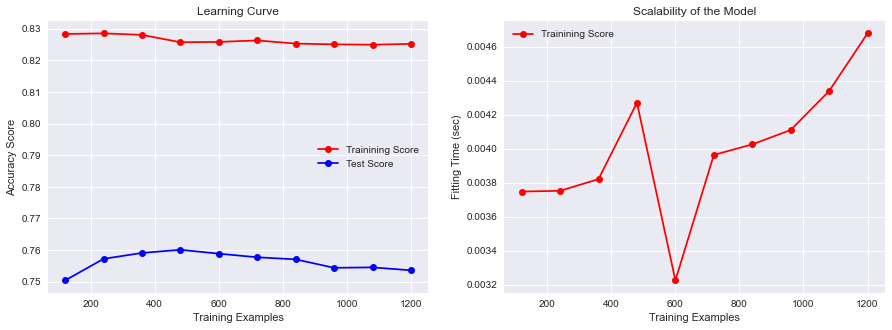

In [22]:
# Mean Values -------------------------------------------------------------------
train_scores_mean = np.mean(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
fit_times_mean = np.mean(fit_times, axis = 1)

# Figures -----------------------------------------------------------------------
plt.figure(figsize=(15,5))
plt.subplot2grid((1,2), (0,0))
plt.plot(train_size, train_scores_mean, 'o-', color = 'red', label = 'Trainining Score')
plt.plot(train_size, test_scores_mean, 'o-', color = 'blue', label = 'Test Score')

plt.title('Learning Curve')
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.legend(loc = 'best')

plt.subplot2grid((1,2), (0,1))
plt.plot(train_size, fit_times_mean, 'o-', color = 'red', label = 'Trainining Score')

plt.title('Scalability of the Model')
plt.xlabel('Training Examples')
plt.ylabel('Fitting Time (sec)')

plt.legend(loc = 'best')
plt.show()

# Metrics

In this section we are going to see how our model behaves:

 * Confusion Matrix:
  * Accuracy
  * Precision
  * Recall
 * ROC and PR curves
  * Area under the curve

In [23]:
print('Confusion Matrix\n\n', confusion_matrix(expected, predicted2))

Confusion Matrix

 [[165  35]
 [ 41  59]]


In [25]:
print('Accuracy: ', '{:.2%}'.format(metrics.accuracy_score(expected, predicted2)))
print('Precision: ', '{:.2%}'.format(metrics.precision_score(expected, predicted2)))
print('Recall: ', '{:.2%}'.format(metrics.recall_score(expected, predicted2)))

Accuracy:  74.67%
Precision:  62.77%
Recall:  59.00%


Precision and Recall are

  * **Precision** is the rate of the True Positives to the *total predicted positives*
  * **Recall** is the rate of True Positives to the *total true positives*

# Graphical Analysis

We have

 * ROC curves(Receiver-Operator) 
 * PR curves (Precision-Recall)

ROC curves are too optimistic when we have unbalanced data

In [26]:
model_probs2 = model2.predict_proba(x_test.values)
fp2, tp2, thresholds2 = roc_curve(y_test, model_probs[:,1], pos_label=1)
prec2, rec2, _ = precision_recall_curve(y_test, model_probs[:,1], pos_label=1)

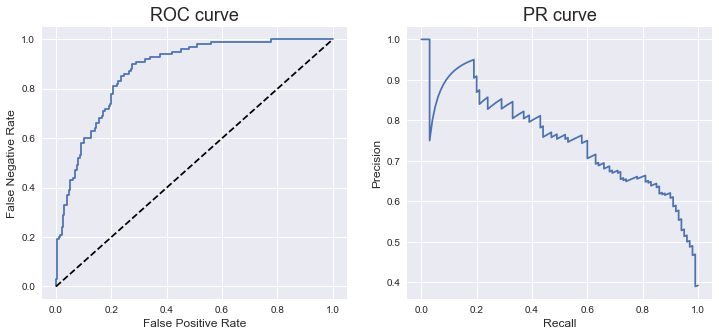

In [27]:
plt.subplot(1,2,1)
plt.plot(fp2, tp2)
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC curve', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('False Negative Rate', fontsize = 12)

plt.subplot(1,2,2)
plt.plot(rec2, prec2)
plt.title('PR curve', fontsize = 18)
plt.ylabel('Precision', fontsize = 12)
plt.xlabel('Recall', fontsize = 12)

plt.show()

In [28]:
metrics.auc(fp2, tp2)

0.87385

In [29]:
metrics.auc(rec2, prec2)

0.753472996121387